# Analysis of CL input files

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import rasterio as rio
import pyvista as pv
import statsmodels.api as sm
from osgeo import gdal
import datetime

sys.path.insert(1, os.path.join(sys.path[0], '..'))
import caesarpy as cp

from pyvista import set_plot_theme
set_plot_theme('document')

In [2]:
ascfile = '/work/armitagj/runs/caesar-explore/pommeroye/input_data/NewDEM_pommeroye.asc'
ncols, nrows, geotransform, data_array = cp.demio.asc2numpy(ascfile)
dXY = geotransform[1]
xcorner = np.linspace(0.5*dXY, (ncols-0.5)*dXY, ncols)
ycorner = np.linspace(0.5*dXY, (nrows-0.5)*dXY, nrows)
z = np.fliplr(data_array)
x,y = np.meshgrid(xcorner, ycorner)

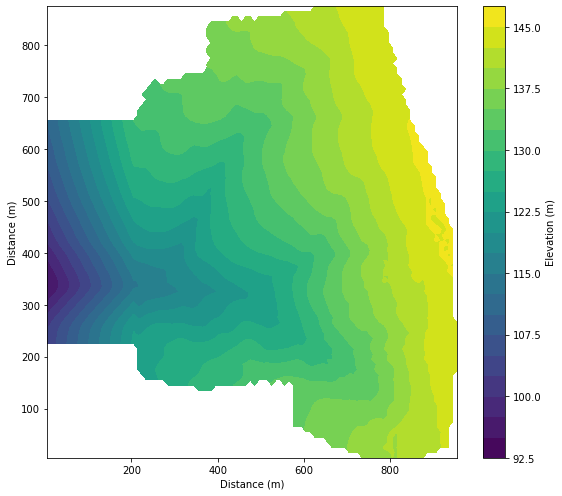

In [3]:
plt.figure(figsize=[8, 7])
plt.subplot(1,1,1)
plt.contourf(x, y, z, 20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Elevation (m)')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.tight_layout()
plt.show()

In [4]:
ascfile = '/work/armitagj/runs/caesar-explore/pommeroye/input_data/DEM_bedrock.asc'
ncols, nrows, geotransform, data_array = cp.demio.asc2numpy(ascfile)
dXY = geotransform[1]
xcorner = np.linspace(0.5*dXY, (ncols-0.5)*dXY, ncols)
ycorner = np.linspace(0.5*dXY, (nrows-0.5)*dXY, nrows)
z = np.fliplr(data_array)
x,y = np.meshgrid(xcorner, ycorner)

In [5]:
print(np.nanmax(z))

145.70184326171875


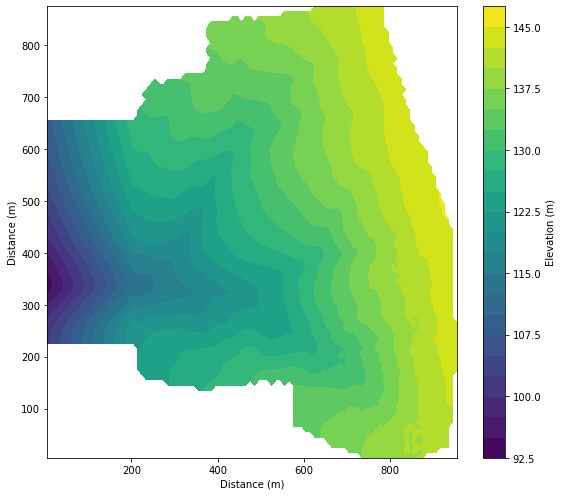

In [6]:
plt.figure(figsize=[8, 7])
plt.subplot(1,1,1)
plt.contourf(x, y, z, 20)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Elevation (m)')
plt.xlabel('Distance (m)')
plt.ylabel('Distance (m)')
plt.tight_layout()
plt.show()

In [7]:
print(np.nanmax(z))

145.70184326171875


<Figure size 1080x360 with 0 Axes>

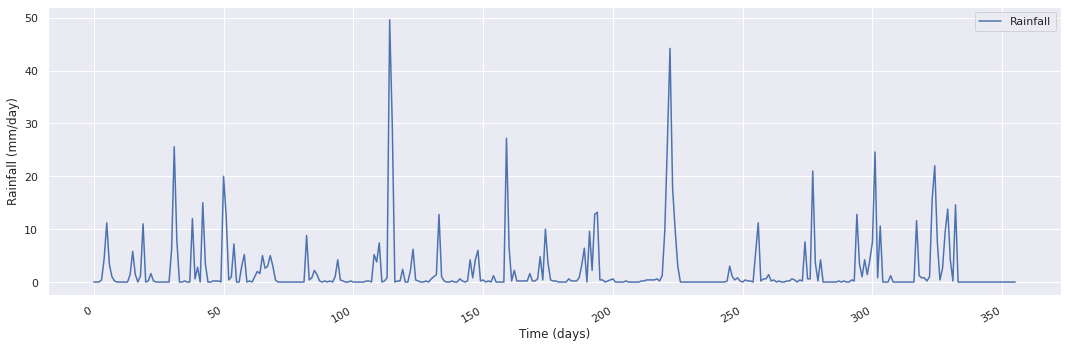

In [16]:
file = '/work/armitagj/runs/caesar-explore/pommeroye/input_data/rainfall_per_day.txt'
rain = pd.read_csv(file, sep=' ', index_col=False, names=['Rainfall'])
sns.set(rc={'figure.figsize':(15, 5)})
plt.figure()
cols_plot = ['Rainfall']
cols_label = ['Rainfall (mm/day)']
axes = rain[cols_plot].plot(marker='', alpha=1, subplots=True)
i = 0
for ax in axes:
    ax.set_ylabel(cols_label[i])
    i += 1
plt.xlabel('Time (days)')
plt.tight_layout()
plt.show()

In [17]:
rain_per_hr = rain.Rainfall.values / 24
np.savetxt('/work/armitagj/runs/caesar-explore/pommeroye/input_data/rainfall_per_hr.txt', rain_per_hr)